<a href="https://colab.research.google.com/github/LeeVvin/AIB_Project4/blob/main/AI_16_P4_%EC%9D%B4%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,742 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# Env
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

from tqdm import tqdm
import time

plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=30) # figure title 폰트 크기

import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False


#url = "C:/Users/82104/Desktop/치안안전 데이터분석 공모전/data"
url = "/content/drive/MyDrive/치안안전 데이터분석 공모전/DATA"

In [ ]:
def dataload(data1,data2,data3):
    '''
    데이터를 로드하고 기본적인 병합을 하는 함수입니다.
    '''
#    print("[dataload start]")
    kp_0 = pd.read_csv(url+'/'+ data1, encoding = 'cp949')
    kp_1 = pd.read_csv(url+'/'+ data2, encoding = 'cp949')
    npa = pd.read_csv(url+'/'+ data3, encoding = 'cp949')
#    print('data load complete')
    df = pd.concat([kp_0,kp_1], axis = 0)
#    print(f"MERGE complete : {df.shape, kp_0.shape, kp_1.shape}")
    print("데이터 로드 완료")
    return df,npa

def column_change(data1,data2):
    '''
     불필요한 컬럼 제거 및 숫자코드 변경하는 함수입니다.
    '''
    #print("[column_change start]")
    data1 = data1.drop(columns = 'NPA_CL')
    data1 = data1.rename(columns = {'RECV_DEPT_NM':'경찰청명','RECV_CPLT_DM':'접수완료시간','EVT_STAT_CD':'사건상태코드','EVT_CL_CD':'사건종별코드','RPTER_SEX':'성별','SME_EVT_YN':'동일사건여부'})
    data2 = data2.rename(columns = {'NPA_CL':'경찰청구분','EVT_STAT_CD':'사건상태코드','EVT_CL_CD':'사건종별코드','RPTER_SEX':'성별','SME_EVT_YN':'동일사건여부'})
    data1['성별'] = np.where(data1.성별 ==1,'남성',
         np.where(data1.성별 ==2,'여성','미상'))
    data2['성별'] = np.where(data2.성별 == '1','남성',
                  np.where(data2.성별 == '2','여성','미상'))
    print("컬럼 제거 및 성별 코드 전환 완료")
    return data1,data2

def code_change(df):
    '''
    코드로 되어있는 컬럼의 값을 변경해주는 함수입니다.
    '''
    #print("[code_change start]")
    df['사건상태코드'] = np.where(df.사건상태코드 == 1,'접수중',np.where(df.사건상태코드 == 2, '접수', np.where(df.사건상태코드 ==3,'지령',np.where(df.사건상태코드 ==4,'도착',
                         np.where(df.사건상태코드 ==5,'도착', np.where(df.사건상태코드 ==6,'네비종결', np.where(df.사건상태코드 ==7,'종결요청',np.where(df.사건상태코드 ==8,'지령취소',
                         np.where(df.사건상태코드 ==9,'타청이첩','종결요청')))))))))
    
    df['사건종별코드'] = np.where(df.사건종별코드 ==1,'중요범죄',np.where(df.사건종별코드 ==2, '기타범죄',np.where(df.사건종별코드 ==3,'질서유지',np.where(df.사건종별코드 ==4,'교통',np.where(df.사건종별코드 ==5,'기타교통업무',
                           np.where(df.사건종별코드 ==6,'타기관_기타',np.where(df.사건종별코드 ==101,'살인',np.where(df.사건종별코드 ==102,'강도',np.where(df.사건종별코드 ==103,'치기',
                           np.where(df.사건종별코드 ==104,'절도',np.where(df.사건종별코드 ==105,'납치감금',np.where(df.사건종별코드 ==106,'성폭력',np.where(df.사건종별코드 ==107,'가정폭력',
                           np.where(df.사건종별코드 ==108,'아동학대(가정내)',np.where(df.사건종별코드 ==109,'아동학대(기타)',np.where(df.사건종별코드 ==201,'폭력',np.where(df.사건종별코드 ==202,'사기',
                           np.where(df.사건종별코드 ==203,'공갈',np.where(df.사건종별코드 ==204,'협박',np.where(df.사건종별코드 ==205,'도박',np.where(df.사건종별코드 ==206,'재물손괴',
                           np.where(df.사건종별코드 ==207,'주거침입',np.where(df.사건종별코드 ==208,'풍속영업',np.where(df.사건종별코드 ==209,'수배불심자',np.where(df.사건종별코드 ==210,'기타형사범',
                           np.where(df.사건종별코드 ==211,'데이트폭력',np.where(df.사건종별코드 ==212,'스토킹',np.where(df.사건종별코드 ==213,'학교폭력',np.where(df.사건종별코드 ==214,'마약',
                           np.where(df.사건종별코드 ==215,'보이스피싱',np.where(df.사건종별코드 ==216,'동물학대',np.where(df.사건종별코드 ==301,'시비',np.where(df.사건종별코드 ==302,'행패소란',
                           np.where(df.사건종별코드 ==303,'청소년비행',np.where(df.사건종별코드 ==304,'무전취식승차',np.where(df.사건종별코드 ==305,'주취자',np.where(df.사건종별코드 ==306,'보호조치',
                           np.where(df.사건종별코드 ==307,'위험방지',np.where(df.사건종별코드 ==308,'기타경범',np.where(df.사건종별코드 ==401,'교통사고',np.where(df.사건종별코드 ==402,'교통불편',
                           np.where(df.사건종별코드 ==403,'교통위반',np.where(df.사건종별코드 ==404,'사망.대형사고',np.where(df.사건종별코드 ==405,'인피도주',np.where(df.사건종별코드 ==406,'음주운전',
                           np.where(df.사건종별코드 ==501,'상담문의',np.where(df.사건종별코드 ==502,'변사자',np.where(df.사건종별코드 ==503,'비상벨',np.where(df.사건종별코드 ==504,'경비업체요청',
                           np.where(df.사건종별코드 ==505,'가출',np.where(df.사건종별코드 ==506,'분실습득',np.where(df.사건종별코드 ==507,'FTX',np.where(df.사건종별코드 ==508,'자살',
                           np.where(df.사건종별코드 ==509,'실종(실종아동)',np.where(df.사건종별코드 ==601,'내용확인불가',np.where(df.사건종별코드 ==602,'화재',np.where(df.사건종별코드 ==603,'구조요청',
                           np.where(df.사건종별코드 ==604,'소음',np.where(df.사건종별코드 ==605,'노점상',np.where(df.사건종별코드 ==606,'기타_타기관',np.where(df.사건종별코드 ==607,'서비스요청',
                           np.where(df.사건종별코드 ==608,'청탁금지법',np.where(df.사건종별코드 ==609,'재해재난',np.where(df.사건종별코드 ==610,'위험동물','error'))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))
    print("사건상태코드 변환 완료")
    return df

def npa_time_police(df):
    '''
    npa 데이터프레임의 datetime 컬럼을 만들어주는 함수입니다.
    '''
    #print("[npa_time_police start]")
    df = npa.astype({'RECV_CPLT_DT':'str'})
    df['RECV_CPLT_TM'] = '00000' + df['RECV_CPLT_TM'].astype(str)
    df['RECV_CPLT_TM'] = df['RECV_CPLT_TM'].str[-6:]
    df['year'] = df['RECV_CPLT_DT'].str[0:4]
    df['month'] = df['RECV_CPLT_DT'].str[4:6]
    df['day'] = df['RECV_CPLT_DT'].str[6:8]
    df['hour'] = df['RECV_CPLT_TM'].str[0:2]
    df['minute'] = df['RECV_CPLT_TM'].str[2:4]
    df['second'] = df['RECV_CPLT_TM'].str[4:6]
    df['TIME'] = df['year'] + '-' + df['month'] + '-' + df['day']+' ' +df['hour']+':'+df['minute']+':'+df['second']
    df['접수완료시간'] = pd.to_datetime(df['TIME'])
    df = df.drop(columns = ['RECV_CPLT_DT','RECV_CPLT_TM','year','month','day','hour','minute','second','TIME'])
    df['경찰청명'] = np.where(df.경찰청구분 == 13, '대전청',np.where(df.경찰청구분 == 19,'충남청','error'))
    df = df.drop(columns = '경찰청구분')
    print("날짜 컬럼 생성 완료")
    return df


def df_datetime_change(df):
    '''
    제공 df의 접수완료시간형태가 달라 통일 및 dtype 변경하는 함수입니다.
    '''
    #print("[df_datetime_change start]")
    df_nerr = df[df['접수완료시간'].str.startswith('2020')]
    df_nerr = df_nerr.astype({'접수완료시간':'str'})
    df_nerr['접수완료시간'] = df_nerr['접수완료시간'].astype(str) + ':00'
    df_err = df[df['접수완료시간'].str.startswith('21/') | df['접수완료시간'].str.startswith('22/') | df['접수완료시간'].str.startswith('23/')]
    
    df_err['year'] = '20' + df_err['접수완료시간'].str[0:2]
    df_err['month'] = df_err['접수완료시간'].str[3:5]
    df_err['day'] = df_err['접수완료시간'].str[6:8]
    df_err['hour'] = df_err['접수완료시간'].str[9:11]
    df_err['minute'] = df_err['접수완료시간'].str[12:14]
    df_err['second'] = df_err['접수완료시간'].str[15:17]
    df_err['TIME'] = df_err['year'] + '-' + df_err['month'] + '-' + df_err['day']+' ' +df_err['hour']+':'+df_err['minute']+':'+df_err['second']
    df_err['접수완료시간'] = pd.to_datetime(df_err['TIME'])
    df_err = df_err.drop(columns = ['year','month','day','hour','minute','second','TIME'])
    
    df_final = pd.concat([df_nerr, df_err ])
    print("날짜 컬럼 통일 완료")
    return df_final

def isitsame(df):
    '''
    동일사건 여부 값을 수정하는 함수입니다. Q는 nan으로 알 수 없음입니다.
    '''
    #print("[isitsame start]")
    df['동일사건여부'] = df['동일사건여부'].replace(np.nan,'Q').replace(" ",'Q')
    print("동일사건여부 컬럼 수정 완료")
    return df

def final_merge(data1,data2):
    '''
    전처리된 데이터들을 병합하는 함수입니다.
    '''
    #print("[final_merge start]")
    data1 = data1.rename(columns = {'HPPN_PNU_ADDR':'사건주소'})
    data2 = data2.rename(columns = {'HPPN_OLD_ADDR':'사건주소'})
    df = pd.concat([data1,data2])
    df = df.reset_index()
    df = df.rename(columns = {'HPPN_X':'경도','HPPN_Y':'위도'}) # 원 데이터가 반대로 표시됨
    print("전처리 완료")
    return df

In [ ]:
%%time
df,npa = dataload('KP2020.csv','KP2021.csv' , 'NPA2020.csv')
df,npa = column_change(df,npa)
df = code_change(df)
npa = code_change(npa)
npa = npa_time_police(npa)
df = df_datetime_change(df)
df = isitsame(df)
npa = isitsame(npa)
data = final_merge(df,npa)

데이터 로드 완료
컬럼 제거 및 성별 코드 전환 완료
사건상태코드 변환 완료
사건상태코드 변환 완료
날짜 컬럼 생성 완료
날짜 컬럼 통일 완료
동일사건여부 컬럼 수정 완료
동일사건여부 컬럼 수정 완료
전처리 완료
CPU times: user 46.2 s, sys: 9.29 s, total: 55.5 s
Wall time: 59 s


In [ ]:
%%time
df_clean = data.dropna()
df_clean = df_clean[df_clean.사건주소 != ' ']
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(columns = ['level_0','index'])
df_clean['지역1'] = df_clean["사건주소"].str.split(" ", expand = True)[0]
df_clean['지역2'] = df_clean["사건주소"].str.split(" ", expand = True)[1]
df_clean['지역'] = np.where(((df_clean.지역1 =='충청남도') | (df_clean.지역1 =='충남')),df_clean.지역2.values, df_clean.지역1.values)
df_clean = df_clean.drop(columns = ['지역1','지역2'])
keyword = ['천안시','아산시','아산','서산시','당진시','논산시','공주시','홍성군','보령군','예산군','부여군',
           '태안군','서천군','금산군','계룡시','청양군','대전광역시','대전','세종특별자치시']
df_target = df_clean[df_clean.지역.isin(keyword)]
df_target['지역'] = df_target['지역'].replace('대전','대전광역시').replace('아산','아산시')
df_target = df_target.reset_index()
df_target = df_target.drop(columns = 'index')
df_target['접수완료시간'] = pd.to_datetime(df_target['접수완료시간'])
df_target = df_target.sort_values(by='접수완료시간',ascending=True)
df_target['접수완료일'] = pd.to_datetime(df_target['접수완료시간']).dt.strftime('%Y-%m-%d')
df_group = df_target.groupby(['지역','접수완료일']).agg(일별범죄횟수 = ('사건종별코드','count')).reset_index()
df_group

CPU times: user 38.7 s, sys: 2.68 s, total: 41.4 s
Wall time: 41.6 s


,지역,접수완료일,일별범죄횟수
0,계룡시,2020-01-01,5
1,계룡시,2020-01-02,11
2,계룡시,2020-01-03,13
3,계룡시,2020-01-04,58
4,계룡시,2020-01-05,29
...,...,...,...
17667,홍성군,2023-01-14,32
17668,홍성군,2023-01-15,44
17669,홍성군,2023-01-16,23
17670,홍성군,2023-01-17,24


In [ ]:
data = df_group[['일별범죄횟수']]
data

,일별범죄횟수
0,5
1,11
2,13
3,58
4,29
...,...
17667,32
17668,44
17669,23
17670,24


In [ ]:
DAY = 15000
arr = np.array(data)
x_train = []
y_train = []

for x in range(DAY, len(df_group)):
    x_train.append(arr[x-DAY:x,0])
    y_train.append(arr[x,0])
x_train,y_train = np.array(x_train).astype(np.float32), np.array(y_train).astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape,y_train.shape

((2672, 15000, 1), (2672,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 15000, 50)         10400     
                                                                 
 dropout_6 (Dropout)         (None, 15000, 50)         0         
                                                                 
 lstm_7 (LSTM)               (None, 15000, 50)         20200     
                                                                 
 dropout_7 (Dropout)         (None, 15000, 50)         0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

model.fit(x_train, 
          y_train, 
          epochs=5, 
          batch_size = 32,
          callbacks = [checkpointer])

Epoch 1/5
84/84 [==============================] - ETA: 0s - loss: 871.2463

84/84 [==============================] - 97s 1s/step - loss: 871.2463
Epoch 2/5
84/84 [==============================] - ETA: 0s - loss: 593.8476

84/84 [==============================] - 93s 1s/step - loss: 593.8476
Epoch 3/5
84/84 [==============================] - ETA: 0s - loss: 477.9838

84/84 [==============================] - 93s 1s/step - loss: 477.9838
Epoch 4/5
84/84 [==============================] - ETA: 0s - loss: 405.5655

84/84 [==============================] - 93s 1s/step - loss: 405.5655
Epoch 5/5
84/84 [==============================] - ETA: 0s - loss: 356.7107

84/84 [==============================] - 93s 1s/step - loss: 356.7107


In [ ]:
arr[1:0]

array([], shape=(0, 10), dtype=object)

In [ ]:
DAY = 15000
arr = np.array(data)
x_train = []
y_train = []

for x in range(DAY, len(df_group)):
    x_train.append(arr[x-DAY:x,0])
    y_train.append(arr[x,0])
x_train,y_train = np.array(x_train).astype(np.float32), np.array(y_train).astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape,y_train.shape

In [ ]:
x_test = []
for x in range(DAY,len(df_group)):
  x_test.append(arr[x-DAY:x,0])
x_test = np.array(x_test).astype(np.float32)
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] ,1))


In [ ]:
pred = model.predict(x_test)

84/84 [==============================] - 45s 523ms/step


In [ ]:
pred[0]

array([24.965538], dtype=float32)

In [ ]:
prediction = pd.DataFrame()
prediction['sample'] = pred.tolist()
prediction = prediction.astype({'sample':'str'})
prediction['pred'] = prediction['sample'].str.extract('(\d+.\d+)')#.str.replace('[','')
#prediction['PRED'] = prediction['pred'].str.extract('(\d+.\d+)')
prediction = prediction[['pred']]
prediction

,pred
0,24.965538024902344
1,24.965173721313477
2,24.965187072753906
3,24.964893341064453
4,24.965309143066406
...,...
2667,24.974485397338867
2668,24.974502563476562
2669,24.974485397338867
2670,24.974512100219727


In [ ]:
prediction = prediction.astype({'pred':'float'})

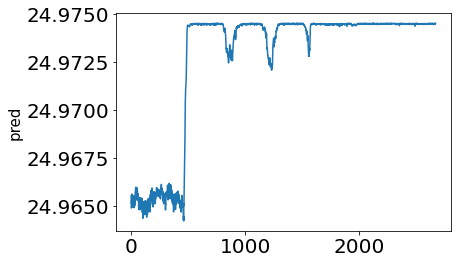

In [ ]:
sns.lineplot(x = prediction.index, y='pred',data = prediction)

In [ ]:
val = df_group.iloc[-2672:].reset_index()
val

,index,지역,접수완료일,일별범죄횟수
0,15000,청양군,2021-10-12,3
1,15001,청양군,2021-10-13,6
2,15002,청양군,2021-10-14,3
3,15003,청양군,2021-10-15,12
4,15004,청양군,2021-10-16,7
...,...,...,...,...
2667,17667,홍성군,2023-01-14,32
2668,17668,홍성군,2023-01-15,44
2669,17669,홍성군,2023-01-16,23
2670,17670,홍성군,2023-01-17,24


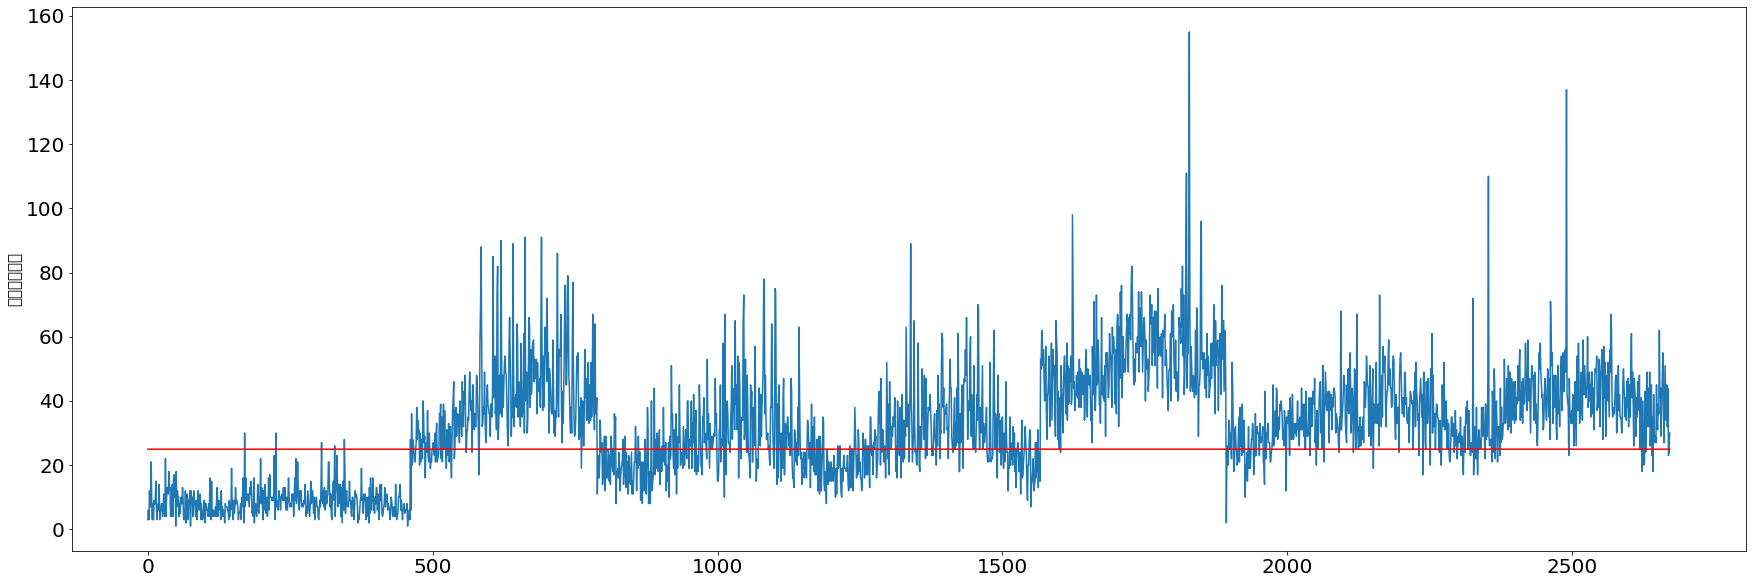

In [ ]:
plt.figure(figsize = (30,10))
sns.lineplot(x=val.index,y='일별범죄횟수',data = val)
sns.lineplot(x = prediction.index, y='pred',data = prediction,color='red')